In [84]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import folium

In [7]:
grocery = pd.read_csv('data/Historical SNAP Retailer Locator Data-20231231 (1).csv')
grocery

Record ID                     Store Name                 Store Type  \
0          785740           ADAK GENERAL STORE            Convenience Store   
1          512036  Alaska Commercial Company 325  Combination Grocery/Other   
2          758776  Alaska Commercial Company 220  Combination Grocery/Other   
3          672376       ALEUTIAN COMMERCIAL CO    Combination Grocery/Other   
4          309052   ALEUTIAN COMMERCIAL CO INC          Large Grocery Store   
...           ...                            ...                        ...   
189660     593642                MIAMI GROCERY          Small Grocery Store   
189661     822529          MICHELLE FADOS DELI            Seafood Specialty   
189662     628749              MIDGET MART INC                      Unknown   
189663     687001                MIDTOWN FOODS            Convenience Store   
189664     661049                  MIGHTY BUCK          Small Grocery Store   

       Street Number     Street Name Additional Address        City State  \
0              42311   FINGER BAY RD                           ADAK    AK   
1                  1      BAYVIEW DR                      KING COVE    AK   
2                100         Main St                NaN  Sand Point    AK   
3                100            MAIN                     SAND POINT    AK   
4                100         MAIN ST                     SAND POINT    AK   
...              ...             ...                ...         ...   ...   
189660          3414       N 15th St                          Tampa    FL   
189661          3609       N 15th St                          Tampa    FL   
189662        1604-A     EAST HWY 60                        VALRICO    FL   
189663          7606  N Nebraska Ave                          Tampa    FL   
189664          7738   Palm River Rd                          Tampa    FL   

        Zip Code  Zip4          County  Latitude  Longitude  \
0          99546  2036  ALEUTIANS EAST  51.84434 -176.62840   
1          99612        ALEUTIANS EAST  55.05876 -162.31340   
2          99661  9800  ALEUTIANS EAST  55.33546 -160.49550   
3          99661        ALEUTIANS EAST   0.00000    0.00000   
4          99661        ALEUTIANS EAST  55.30257 -160.40450   
...          ...   ...             ...       ...        ...   
189660     33605  1102    HILLSBOROUGH   0.00000    0.00000   
189661     33605  1105    HILLSBOROUGH  27.97718  -82.44292   
189662     33594          HILLSBOROUGH   0.00000    0.00000   
189663     33604  4237    HILLSBOROUGH   0.00000    0.00000   
189664     33619  4215              HI       NaN        NaN   

       Authorization Date    End Date  
0              05/08/2006  03/01/2016  
1              02/02/1999              
2              07/05/2005              
3              01/26/1973  07/29/1993  
4              07/28/1993  07/11/2005  
...                   ...         ...  
189660         06/23/1992  08/24/1993  
189661         07/16/2007  09/15/2011  
189662         04/26/1993  05/15/1995  
189663         12/04/1998  11/28/2000  
189664                NaN         NaN  

[189665 rows x 15 columns]

In [13]:
grocery = grocery.query("County == 'LOS ANGELES'")

In [14]:
grocery['Store Type'].unique()

array(['Convenience Store', 'Fruits/Veg Specialty', 'Seafood Specialty',
       'Unknown', 'Small Grocery Store', 'Medium Grocery Store',
       'Delivery Route', 'Combination Grocery/Other', 'Food Buying Co-op',
       'Super Store', 'Supermarket', 'Meat/Poultry Specialty',
       'Bakery Specialty', "Farmers' Market", 'Large Grocery Store',
       'Wholesaler', 'Military Commissary'], dtype=object)

In [15]:
grocery = grocery[grocery['Store Type'].str.contains('Convenience Store')==False]

In [16]:
grocery = grocery[grocery['Store Type'].str.contains('Fruits/Veg Specialty')==False]

In [17]:
grocery = grocery[grocery['Store Type'].str.contains('Seafood Specialty')==False]

In [18]:
grocery = grocery[grocery['Store Type'].str.contains('Unknown')==False]

In [19]:
grocery = grocery[grocery['Store Type'].str.contains('Wholesaler')==False]

In [20]:
grocery = grocery[grocery['Store Type'].str.contains('Bakery Specialty')==False]

In [21]:
grocery = grocery[grocery['Store Type'].str.contains('Military Commissary')==False]

In [22]:
grocery = grocery[grocery['Store Type'].str.contains('Meat/Poultry Specialty')==False]

In [23]:
grocery = grocery[grocery['Store Type'].str.contains('Delivery Route')==False]

In [24]:
grocery = grocery[grocery['Store Type'].str.contains('Combination Grocery/Other')==False]

In [25]:
grocery

Record ID                            Store Name            Store Type  \
63286     522382                $1 + DISCOUNT MARKET     Small Grocery Store   
63295     988037            $1 Store & Discount Mart    Medium Grocery Store   
63304     600292                 .99 CENTS LAND PLUS     Small Grocery Store   
63310    1154471                      1 And Up Store     Small Grocery Store   
63320    1267829                1 Stop Shop Rite Inc     Small Grocery Store   
...          ...                                   ...                   ...   
93869    1408419                        ZJ Nutrition     Small Grocery Store   
93875    1224024                            Zovk Inc    Medium Grocery Store   
93879    1263390  Zuly's 99 And Up Discount 99 Y Mas     Small Grocery Store   
93882     605946               ZVARTNOTS MINI MARKET     Small Grocery Store   
93883     579323               ZVAZTROTS MINI MARKET     Small Grocery Store   

      Street Number        Street Name Additional Address             City  \
63286         10401    Long Beach Blvd                             Lynwood   
63295           848    W Palmdale Blvd                            Palmdale   
63304          1070         E Broadway                          Long Beach   
63310         11151        Avalon Blvd            Ste 105      Los Angeles   
63320          1110  S Long Beach Blvd              Ste 2          Compton   
...             ...                ...                ...              ...   
93869          2031          E 10th St                NaN       Long Beach   
93875         11009       Burbank Blvd            Ste 125  North Hollywood   
93879          3326      S Central Ave                         Los Angeles   
93882           209       N Verdugo Rd                            Glendale   
93883          2353    W Whittier Blvd                          Montebello   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63286    CA     90262  1600  LOS ANGELES  33.93952  -118.2144   
63295    CA     93551  4250  LOS ANGELES  34.58665  -118.1458   
63304    CA     90802  3412  LOS ANGELES   0.00000     0.0000   
63310    CA     90061  3077  LOS ANGELES  33.93383  -118.2652   
63320    CA     90221  4479  LOS ANGELES  33.88638  -118.2063   
...     ...       ...   ...          ...       ...        ...   
93869    CA     90804  4501  LOS ANGELES  33.77922  -118.1669   
93875    CA     91601  5749  LOS ANGELES  34.17219  -118.3707   
93879    CA     90011  2518  LOS ANGELES  34.01336  -118.2565   
93882    CA     91206  3939  LOS ANGELES   0.00000     0.0000   
93883    CA     90640  3006  LOS ANGELES   0.00000     0.0000   

      Authorization Date    End Date  
63286         08/05/1998  08/04/2010  
63295         02/04/2011  04/12/2011  
63304         04/04/2003  04/28/2004  
63310         07/17/2014  05/31/2016  
63320         12/22/2016  06/25/2019  
...                  ...         ...  
93869         10/15/2020  06/16/2022  
93875         02/03/2016  03/07/2019  
93879         11/21/2016  09/03/2018  
93882         04/16/1992  05/26/1993  
93883         09/13/1988  10/07/1992  

[10267 rows x 15 columns]

In [26]:
grocery['end_date']=grocery['End Date'].str[-4:]
grocery

Record ID                            Store Name            Store Type  \
63286     522382                $1 + DISCOUNT MARKET     Small Grocery Store   
63295     988037            $1 Store & Discount Mart    Medium Grocery Store   
63304     600292                 .99 CENTS LAND PLUS     Small Grocery Store   
63310    1154471                      1 And Up Store     Small Grocery Store   
63320    1267829                1 Stop Shop Rite Inc     Small Grocery Store   
...          ...                                   ...                   ...   
93869    1408419                        ZJ Nutrition     Small Grocery Store   
93875    1224024                            Zovk Inc    Medium Grocery Store   
93879    1263390  Zuly's 99 And Up Discount 99 Y Mas     Small Grocery Store   
93882     605946               ZVARTNOTS MINI MARKET     Small Grocery Store   
93883     579323               ZVAZTROTS MINI MARKET     Small Grocery Store   

      Street Number        Street Name Additional Address             City  \
63286         10401    Long Beach Blvd                             Lynwood   
63295           848    W Palmdale Blvd                            Palmdale   
63304          1070         E Broadway                          Long Beach   
63310         11151        Avalon Blvd            Ste 105      Los Angeles   
63320          1110  S Long Beach Blvd              Ste 2          Compton   
...             ...                ...                ...              ...   
93869          2031          E 10th St                NaN       Long Beach   
93875         11009       Burbank Blvd            Ste 125  North Hollywood   
93879          3326      S Central Ave                         Los Angeles   
93882           209       N Verdugo Rd                            Glendale   
93883          2353    W Whittier Blvd                          Montebello   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63286    CA     90262  1600  LOS ANGELES  33.93952  -118.2144   
63295    CA     93551  4250  LOS ANGELES  34.58665  -118.1458   
63304    CA     90802  3412  LOS ANGELES   0.00000     0.0000   
63310    CA     90061  3077  LOS ANGELES  33.93383  -118.2652   
63320    CA     90221  4479  LOS ANGELES  33.88638  -118.2063   
...     ...       ...   ...          ...       ...        ...   
93869    CA     90804  4501  LOS ANGELES  33.77922  -118.1669   
93875    CA     91601  5749  LOS ANGELES  34.17219  -118.3707   
93879    CA     90011  2518  LOS ANGELES  34.01336  -118.2565   
93882    CA     91206  3939  LOS ANGELES   0.00000     0.0000   
93883    CA     90640  3006  LOS ANGELES   0.00000     0.0000   

      Authorization Date    End Date end_date  
63286         08/05/1998  08/04/2010     2010  
63295         02/04/2011  04/12/2011     2011  
63304         04/04/2003  04/28/2004     2004  
63310         07/17/2014  05/31/2016     2016  
63320         12/22/2016  06/25/2019     2019  
...                  ...         ...      ...  
93869         10/15/2020  06/16/2022     2022  
93875         02/03/2016  03/07/2019     2019  
93879         11/21/2016  09/03/2018     2018  
93882         04/16/1992  05/26/1993     1993  
93883         09/13/1988  10/07/1992     1992  

[10267 rows x 16 columns]

In [27]:
grocery['open_date']=grocery['Authorization Date'].str[-4:]

In [28]:
grocery['end_date'].unique()

array(['2010', '2011', '2004', '2016', '2019', '2009', '2005', ' ',
       '2015', '2018', '2003', '2012', '2014', '2008', '1997', '2001',
       '1999', '2000', '2017', '1991', '1994', '2006', '2020', '1992',
       '1996', '2007', '1993', '1998', '2013', '2002', '1995', '2023',
       '2021', '1990', '2022'], dtype=object)

In [29]:
grocery = grocery[grocery['end_date'].str.contains('2010')==False]

In [30]:
grocery = grocery[grocery['end_date'].str.contains('2011')==False]

In [31]:
grocery = grocery[grocery['end_date'].str.contains('2004')==False]

In [32]:
grocery = grocery[grocery['end_date'].str.contains('2016')==False]

In [33]:
grocery = grocery[grocery['end_date'].str.contains('2019')==False]

In [34]:
grocery = grocery[grocery['end_date'].str.contains('2009')==False]

In [35]:
grocery = grocery[grocery['end_date'].str.contains('2005')==False]

In [36]:
grocery = grocery[grocery['end_date'].str.contains('2015')==False]

In [37]:
grocery = grocery[grocery['end_date'].str.contains('2018')==False]

In [38]:
grocery = grocery[grocery['end_date'].str.contains('2003')==False]

In [39]:
grocery = grocery[grocery['end_date'].str.contains('2012')==False]

In [40]:
grocery = grocery[grocery['end_date'].str.contains('2014')==False]

In [41]:
grocery = grocery[grocery['end_date'].str.contains('2008')==False]

In [42]:
grocery = grocery[grocery['end_date'].str.contains('1997')==False]

In [43]:
grocery = grocery[grocery['end_date'].str.contains('2001')==False]

In [44]:
grocery = grocery[grocery['end_date'].str.contains('1999')==False]

In [45]:
grocery = grocery[grocery['end_date'].str.contains('2000')==False]

In [46]:
grocery = grocery[grocery['end_date'].str.contains('2017')==False]

In [47]:
grocery = grocery[grocery['end_date'].str.contains('1991')==False]

In [48]:
grocery = grocery[grocery['end_date'].str.contains('1994')==False]

In [49]:
grocery = grocery[grocery['end_date'].str.contains('2006')==False]

In [50]:
grocery = grocery[grocery['end_date'].str.contains('2020')==False]

In [51]:
grocery = grocery[grocery['end_date'].str.contains('1992')==False]

In [52]:
grocery = grocery[grocery['end_date'].str.contains('1996')==False]

In [53]:
grocery = grocery[grocery['end_date'].str.contains('2007')==False]

In [54]:
grocery = grocery[grocery['end_date'].str.contains('1993')==False]

In [55]:
grocery = grocery[grocery['end_date'].str.contains('1998')==False]

In [56]:
grocery = grocery[grocery['end_date'].str.contains('2013')==False]

In [57]:
grocery = grocery[grocery['end_date'].str.contains('2002')==False]

In [58]:
grocery = grocery[grocery['end_date'].str.contains('1995')==False]

In [59]:
grocery = grocery[grocery['end_date'].str.contains('1990')==False]

In [60]:
grocery

Record ID                       Store Name            Store Type  \
63347    1057607                   168 Market 803           Super Store   
63348    1171270                   168 Market 806           Supermarket   
63349    1192904                   168 Market 805           Super Store   
63350    1263449                  168 Market 5801           Super Store   
63415    1246643  365 by Whole Foods Market 10658           Super Store   
...          ...                              ...                   ...   
93817     764764                   Zamora Bros.    Medium Grocery Store   
93855    1287162                         Zeytun    Medium Grocery Store   
93859     426824            ZIGGY'S MEAT MARKET             Supermarket   
93865    1398029                    Zion Market             Super Store   
93869    1408419                   ZJ Nutrition     Small Grocery Store   

      Street Number     Street Name Additional Address              City  \
63347           933  E Las Tunas Dr                          San Gabriel   
63348         17120       Colima Rd                     Hacienda Heights   
63349         19725       Colima Rd                      Rowland Heights   
63350          1421   E Valley Blvd                             Alhambra   
63415          2520   Glendale Blvd                          Los Angeles   
...             ...             ...                ...               ...   
93817          1559     W Pico Blvd                NaN       Los Angeles   
93855          5135   W Sunset Blvd                          Los Angeles   
93859           965    N Maclay Ave                         San Fernando   
93865           888   S Vermont Ave                NaN       Los Angeles   
93869          2031       E 10th St                NaN        Long Beach   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63347    CA     91776  1640  LOS ANGELES  34.10347  -118.0877   
63348    CA     91745  6768  LOS ANGELES  33.99066  -117.9333   
63349    CA     91748  3299  LOS ANGELES  33.98619  -117.8717   
63350    CA     91801  5239  LOS ANGELES  34.07928  -118.1099   
63415    CA     90039  3220  LOS ANGELES  34.10309  -118.2592   
...     ...       ...   ...          ...       ...        ...   
93817    CA     90015  2407  LOS ANGELES  34.04479  -118.2764   
93855    CA     90027  5715  LOS ANGELES  34.09815  -118.3017   
93859    CA     91340  1440  LOS ANGELES  34.29338  -118.4276   
93865    CA     90005  1523  LOS ANGELES  34.05605  -118.2916   
93869    CA     90804  4501  LOS ANGELES  33.77922  -118.1669   

      Authorization Date    End Date end_date open_date  
63347         06/01/2012                           2012  
63348         11/20/2014                           2014  
63349         04/09/2015                           2015  
63350         10/24/2016                           2016  
63415         05/11/2016                           2016  
...                  ...         ...      ...       ...  
93817         05/25/2023                           2023  
93855         06/21/2017                           2017  
93859         07/12/1995                           1995  
93865         03/25/2020                           2020  
93869         10/15/2020  06/16/2022     2022      2020  

[2496 rows x 17 columns]

In [61]:
grocery['open_date'].unique()

array(['2012', '2014', '2015', '2016', '2013', '2022', '1989', '1990',
       '1991', '1992', '1994', '1995', '1998', '2003', '2023', '2021',
       '2017', '2008', '2020', '2019', '2018', '2010', '1996', '2006',
       '2009', '2001', '1997', '2007', '1930', '1999', '2011', '1987',
       '2005', '1988', '1993', '2002', '1977', '1985', '2004', '2000',
       '1984', '1986', '1982', '1965', '1966', '1971', '1983', '1975',
       '1976', '1974', '1979'], dtype=object)

In [62]:
grocery = grocery[grocery['open_date'].str.contains('2023')==False]

In [63]:
grocery = grocery[grocery['open_date'].str.contains('2022')==False]

In [64]:
grocery = grocery[grocery['open_date'].str.contains('2021')==False]

In [65]:
grocery = grocery[grocery['open_date'].str.contains('2020')==False]

In [66]:
grocery

Record ID                       Store Name            Store Type  \
63347    1057607                   168 Market 803           Super Store   
63348    1171270                   168 Market 806           Supermarket   
63349    1192904                   168 Market 805           Super Store   
63350    1263449                  168 Market 5801           Super Store   
63415    1246643  365 by Whole Foods Market 10658           Super Store   
...          ...                              ...                   ...   
93779    1163074                          Yummy             Supermarket   
93780    1108714                          Yummy             Supermarket   
93816     764764                   Zamora Bros.    Medium Grocery Store   
93855    1287162                         Zeytun    Medium Grocery Store   
93859     426824            ZIGGY'S MEAT MARKET             Supermarket   

      Street Number       Street Name Additional Address              City  \
63347           933    E Las Tunas Dr                          San Gabriel   
63348         17120         Colima Rd                     Hacienda Heights   
63349         19725         Colima Rd                      Rowland Heights   
63350          1421     E Valley Blvd                             Alhambra   
63415          2520     Glendale Blvd                          Los Angeles   
...             ...               ...                ...               ...   
93779          5520  San Vicente Blvd                          Los Angeles   
93780          3607     W Sunset Blvd                          Los Angeles   
93816          1559       W Pico Blvd                NaN       Los Angeles   
93855          5135     W Sunset Blvd                          Los Angeles   
93859           965      N Maclay Ave                         San Fernando   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63347    CA     91776  1640  LOS ANGELES  34.10347  -118.0877   
63348    CA     91745  6768  LOS ANGELES  33.99066  -117.9333   
63349    CA     91748  3299  LOS ANGELES  33.98619  -117.8717   
63350    CA     91801  5239  LOS ANGELES  34.07928  -118.1099   
63415    CA     90039  3220  LOS ANGELES  34.10309  -118.2592   
...     ...       ...   ...          ...       ...        ...   
93779    CA     90019  2799  LOS ANGELES  34.05383  -118.3545   
93780    CA     90026  1058  LOS ANGELES  34.09010  -118.2771   
93816    CA     90015  2407  LOS ANGELES  34.04479  -118.2764   
93855    CA     90027  5715  LOS ANGELES  34.09815  -118.3017   
93859    CA     91340  1440  LOS ANGELES  34.29338  -118.4276   

      Authorization Date    End Date end_date open_date  
63347         06/01/2012                           2012  
63348         11/20/2014                           2014  
63349         04/09/2015                           2015  
63350         10/24/2016                           2016  
63415         05/11/2016                           2016  
...                  ...         ...      ...       ...  
93779         12/01/2014                           2014  
93780         04/10/2019                           2019  
93816         04/20/2011  07/01/2022     2022      2011  
93855         06/21/2017                           2017  
93859         07/12/1995                           1995  

[1870 rows x 17 columns]

In [69]:
grocery['latlon']=grocery[['Latitude','Longitude']].values.tolist()
grocery

Record ID                       Store Name            Store Type  \
63347    1057607                   168 Market 803           Super Store   
63348    1171270                   168 Market 806           Supermarket   
63349    1192904                   168 Market 805           Super Store   
63350    1263449                  168 Market 5801           Super Store   
63415    1246643  365 by Whole Foods Market 10658           Super Store   
...          ...                              ...                   ...   
93779    1163074                          Yummy             Supermarket   
93780    1108714                          Yummy             Supermarket   
93816     764764                   Zamora Bros.    Medium Grocery Store   
93855    1287162                         Zeytun    Medium Grocery Store   
93859     426824            ZIGGY'S MEAT MARKET             Supermarket   

      Street Number       Street Name Additional Address              City  \
63347           933    E Las Tunas Dr                          San Gabriel   
63348         17120         Colima Rd                     Hacienda Heights   
63349         19725         Colima Rd                      Rowland Heights   
63350          1421     E Valley Blvd                             Alhambra   
63415          2520     Glendale Blvd                          Los Angeles   
...             ...               ...                ...               ...   
93779          5520  San Vicente Blvd                          Los Angeles   
93780          3607     W Sunset Blvd                          Los Angeles   
93816          1559       W Pico Blvd                NaN       Los Angeles   
93855          5135     W Sunset Blvd                          Los Angeles   
93859           965      N Maclay Ave                         San Fernando   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63347    CA     91776  1640  LOS ANGELES  34.10347  -118.0877   
63348    CA     91745  6768  LOS ANGELES  33.99066  -117.9333   
63349    CA     91748  3299  LOS ANGELES  33.98619  -117.8717   
63350    CA     91801  5239  LOS ANGELES  34.07928  -118.1099   
63415    CA     90039  3220  LOS ANGELES  34.10309  -118.2592   
...     ...       ...   ...          ...       ...        ...   
93779    CA     90019  2799  LOS ANGELES  34.05383  -118.3545   
93780    CA     90026  1058  LOS ANGELES  34.09010  -118.2771   
93816    CA     90015  2407  LOS ANGELES  34.04479  -118.2764   
93855    CA     90027  5715  LOS ANGELES  34.09815  -118.3017   
93859    CA     91340  1440  LOS ANGELES  34.29338  -118.4276   

      Authorization Date    End Date end_date open_date                 latlon  
63347         06/01/2012                           2012  [34.10347, -118.0877]  
63348         11/20/2014                           2014  [33.99066, -117.9333]  
63349         04/09/2015                           2015  [33.98619, -117.8717]  
63350         10/24/2016                           2016  [34.07928, -118.1099]  
63415         05/11/2016                           2016  [34.10309, -118.2592]  
...                  ...         ...      ...       ...                    ...  
93779         12/01/2014                           2014  [34.05383, -118.3545]  
93780         04/10/2019                           2019   [34.0901, -118.2771]  
93816         04/20/2011  07/01/2022     2022      2011  [34.04479, -118.2764]  
93855         06/21/2017                           2017  [34.09815, -118.3017]  
93859         07/12/1995                           1995  [34.29338, -118.4276]  

[1870 rows x 18 columns]

In [70]:
grocerysubset = grocery.head(5)

In [73]:
latlon = list(grocerysubset['latlon'])
latlon

[[34.10347, -118.0877],
 [33.99066, -117.9333],
 [33.98619, -117.8717],
 [34.07928, -118.1099],
 [34.10309, -118.2592]]

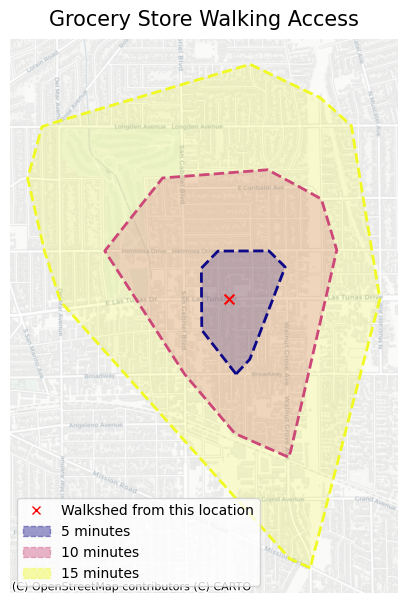

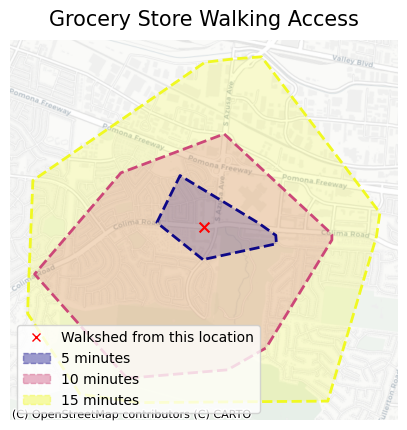

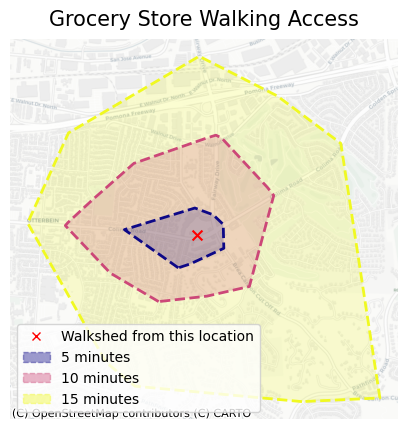

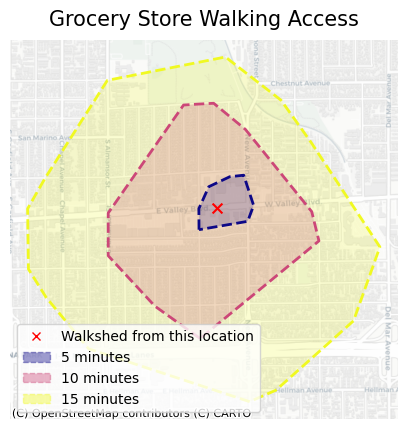

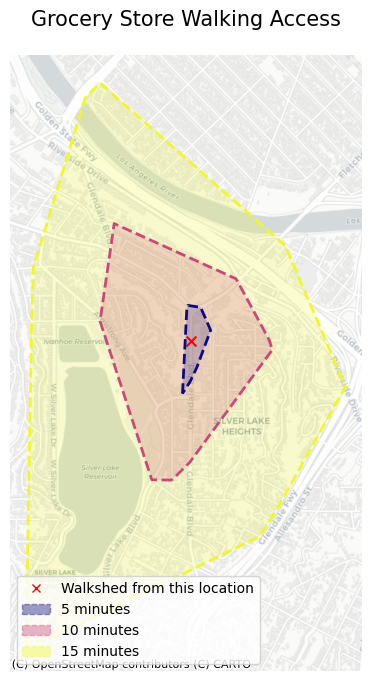

In [75]:
def isomap(latlon=latlon):
    network_type = 'walk'
    trip_times = [5,10,15] 
    meters_per_minute = 75 # travel distance per minute
    cmap = 'plasma'
    title = 'Grocery Store Walking Access'
    
    # download the street network
    G = ox.graph_from_point(latlon, network_type=network_type, dist = 2000)
    
    # project our network data to Web Mercator (measurements are in meters)
    G = ox.project_graph(G, to_crs='epsg:3857')
    
    # convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    
    # get the bounding box coordinates
    minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
    
    # calculate the centroid
    centroid_x = (maxx-minx)/2 + minx
    centroid_y = (maxy-miny)/2 + miny
    
    # use osmnx's distance.nearest_nodes command to get the id for the nearest node
    center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
    
    # create a new column, calculate the time it takes to travel that edge
    gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute
    
    # assign a color hex code for each trip time isochrone
    iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                    cmap=cmap, 
                                    start=0, 
                                    return_hex=True)
    
    # create a list of "zipped" time/colors
    time_color = list(zip(trip_times, iso_colors))
    
    # reverse the order so that outside nodes get associated first
    time_color.reverse()
    
    # loop through each trip time and associated color
    for time, color in list(time_color):
    
        # for each trip time, create an egograph of nodes that fall within that distance
        subgraph = nx.ego_graph(G, center_node, radius=time)
    
        # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
        for node in subgraph.nodes():
            gdf_nodes.loc[node,'time'] = time
            gdf_nodes.loc[node,'color'] = color
    
    # the NaN values then need to be populated with a valid color
    gdf_nodes['color'].fillna('#cccccc', inplace=True)
    
    # dissolve the nodes by time
    # adding the "time" argument creates a separate geometry (multipoint in this case) for each unique time category
    isochrones = gdf_nodes.dissolve(by = "time")
    
    # for each row, create a convex hull
    isochrones = isochrones.convex_hull.reset_index(name='geometry')
    
    # reverse the order so that outer polygon gets drawn first
    isochrones.sort_values(by='time', ascending=False,inplace=True)
    
    # reverse the colors too!
    iso_colors.reverse()
    
    ########################
    
    #    Make the map!
    
    ########################
    # set up the subplots
    fig, ax = plt.subplots(figsize=(5,8))
    
    # add the isochrone boundary
    isochrones.boundary.plot(
        ax=ax,
        alpha=1,
        linestyle='--',
        color=iso_colors,
        lw=2
        ) 
    
    # add the isochrones
    isochrones.plot(
        ax=ax, 
        alpha=0.2, 
        categorical=True, # even though it is numeric, treat it as categorical
        color=iso_colors,
        )
    
    # add the center node in red
    gdf_nodes.loc[[center_node]].plot(
        ax=ax,
        color='r',
        marker='x',
        markersize=50
        )
    
    # build custom legend
    legend_elements = [
        # add the center node to the legend
        Line2D([0], [0], marker='x', color='red', linestyle='',label='Walkshed from this location', markersize=6),
        ]
    
    # sort back to small time to large time
    # time_color.sort(reverse=False)
    time_color.reverse()
    
    # loop through the list of time/colors and add each to the legend
    for time,color in list(time_color):
        legend_item = Patch(facecolor=color, edgecolor=color, linestyle='--',linewidth=1,label=str(time)+' minutes',alpha=0.4)
        legend_elements.append(legend_item)
    
    # add the legend
    ax.legend(handles=legend_elements,loc='lower left') # location options: upper/center/lower and left/center/right
    
    # add a title
    ax.set_title(title,fontsize=15,pad=10)
    
    # hide the axis
    ax.axis('off')
    
    # add the basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# list of neighborhoods
latlong = list(grocerysubset['latlon'])

# call the function with a loop
for store in latlong:
    isomap(latlon=store)

In [76]:
calfresh = gpd.read_file('data/CalFresh_Cases_(tract).geojson')

In [77]:
calfresh

tract  families_all  fam_below_200fpl  fam_below_300fpl  \
0     06037101110          1085               249               453   
1     06037101122           988                81               180   
2     06037101220           960               328               458   
3     06037101221           934               398               545   
4     06037101222           681               462               558   
...           ...           ...               ...               ...   
2490  06037980035           104                54                67   
2491  06037980036           149                80                80   
2492  06037980037             0                 0                 0   
2493  06037980038             0                 0                 0   
2494  06037980039             0                 0                 0   

      fam_received_ssi_cash_assistanc  fam_below_fpl_pct  \
0                                 165                7.4   
1                                  88                2.8   
2                                 193               13.5   
3                                 369               10.3   
4                                 151               33.2   
...                               ...                ...   
2490                                1               15.4   
2491                                0               26.2   
2492                                0                NaN   
2493                                0                NaN   
2494                                0                NaN   

      fam_below_200fpl_pct  fam_below_300fpl_pct  fam_received_assistance_pct  \
0                     22.9                  41.8                         15.2   
1                      8.2                  18.2                          8.9   
2                     34.2                  47.7                         20.1   
3                     42.6                  58.4                         39.5   
4                     67.8                  81.9                         22.2   
...                    ...                   ...                          ...   
2490                  51.9                  64.4                          1.0   
2491                  53.7                  53.7                          0.0   
2492                   0.0                   0.0                          0.0   
2493                   0.0                   0.0                          0.0   
2494                   0.0                   0.0                          0.0   

      fam_below_fpl_received_assistan  ...                                csa  \
0                                14.5  ...              Los Angeles - Tujunga   
1                                 0.0  ...              Los Angeles - Tujunga   
2                                22.3  ...              Los Angeles - Tujunga   
3                                19.0  ...              Los Angeles - Tujunga   
4                                19.2  ...              Los Angeles - Tujunga   
...                               ...  ...                                ...   
2490                              0.0  ...                   City of Industry   
2491                              NaN  ...  Unincorporated - Whittier Narrows   
2492                              NaN  ...                     City of Carson   
2493                              NaN  ...    Unincorporated - Ladera Heights   
2494                              NaN  ...    Unincorporated - Universal City   

                       spa calfresh_cases calfresh_per_100_families  \
0     SPA 2 - San Fernando          504.0                      46.5   
1     SPA 2 - San Fernando          210.0                      21.3   
2     SPA 2 - San Fernando          393.0                      40.9   
3     SPA 2 - San Fernando          501.0                      53.6   
4     SPA 2 - San Fernando          401.0                      58.9   
...                    ...            ...                       ..

In [78]:
calfreshsort = calfresh.sort_values(by='calfresh_per_100_families',ascending=False)

<Axes: title={'center': 'Top 10 Census Tracts with the Highest Number of CalFresh Cases per 100 Families Below the Federal Poverty Level'}, xlabel='tract'>

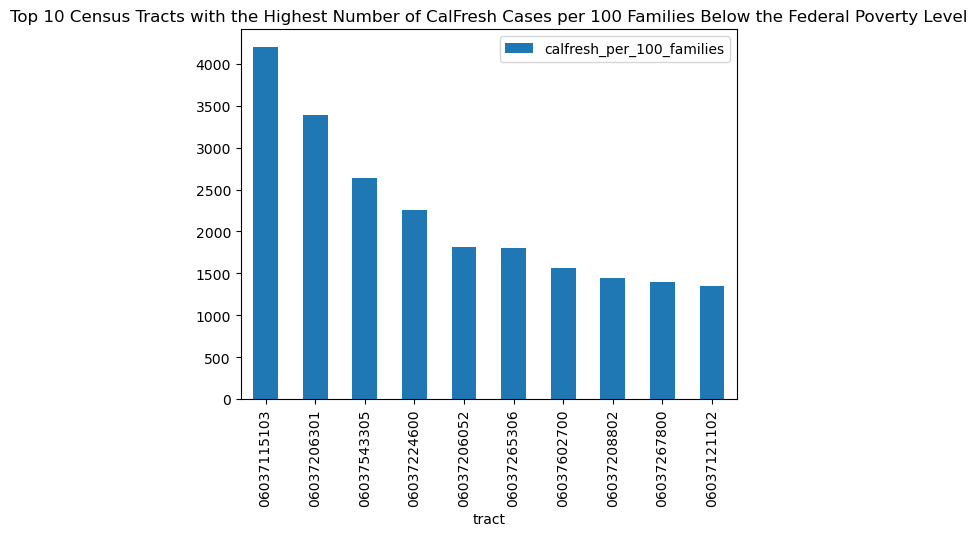

In [80]:
calfreshsort.head(10).plot.bar(x='tract',y='calfresh_per_100_families',
                               title='Top 10 Census Tracts with the Highest Number of CalFresh Cases per 100 Families Below the Federal Poverty Level')

In [86]:
calfreshsort['calfresh_per_100_families'].describe()

count    2495.000000
mean       44.629739
std       157.068387
min         0.000000
25%        17.750000
50%        30.000000
75%        41.650000
max      4200.000000
Name: calfresh_per_100_families, dtype: float64

In [88]:
dpss = gpd.read_file('data/DPSS_Offices.geojson')
dpss

OBJECTID_1           X          Y                         Site  \
0             1 -118.073209  33.914928                      Norwalk   
1             2 -118.073209  33.914928                      Norwalk   
2             3 -118.073209  33.914928                      Norwalk   
3             4 -118.265290  34.137380                     Glendale   
4             6 -118.265290  34.137380                     Glendale   
..          ...         ...        ...                          ...   
133         151 -118.278510  34.061321             Wilshire Special   
134         152 -118.278510  34.061321             Wilshire Special   
135         154 -118.448960  34.208202  East Valley & Santa Clarita   
136         155 -118.372526  34.235896      San Fernando Sub Office   
137         156 -118.309497  33.924243            Southwest Special   

                     Address         City State    Zip Sup   Program  \
0         12727 Norwalk Blvd      Norwalk    CA  90650   4  CalFresh   
1         12727 Norwalk Blvd      Norwalk    CA  90650   4  CalWORKs   
2         12727 Norwalk Blvd      Norwalk    CA  90650   4  Medi-Cal   
3       4680 San Fernando Rd     Glendale    CA  91204   5  CalWORKs   
4       4680 San Fernando Rd     Glendale    CA  91204   5  CalFresh   
..                       ...          ...   ...    ...  ..       ...   
133            2415 W 6th St  Los Angeles    CA  90057   1  CalWORKs   
134            2415 W 6th St  Los Angeles    CA  90057   1  Medi-Cal   
135       7555 Van Nuys Blvd     Van Nuys    CA  91405   3      GAIN   
136       9188 Glenoaks Blvd   Sun Valley    CA  91352   3  Medi-Cal   
137  1819 Charlie Sifford Dr  Los Angeles    CA  90047   2  Medi-Cal   

          Telephone                     geometry  
0    (866) 613-3777  POINT (-118.07321 33.91493)  
1    (866) 613-3777  POINT (-118.07321 33.91493)  
2    (866) 613-3777  POINT (-118.07321 33.91493)  
3    (866) 613-3777  POINT (-118.26529 34.13738)  
4    (866) 613-3777  POINT (-118.26529 34.13738)  
..              ...                          ...  
133  (866) 613-3777  POINT (-118.27851 34.06132)  
134  (866) 613-3777  POINT (-118.27851 34.06132)  
135  (877) 292-4246  POINT (-118.44896 34.20820)  
136  (866) 613-3777  POINT (-118.37253 34.23590)  
137  (866) 613-3777  POINT (-118.30950 33.92424)  

[138 rows x 12 columns]

In [98]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron',
               attribution='CartoDB')

for index, row in dpss.iterrows():
    folium.Marker(location=[row["Y"], row["X"]],
                       zorder=1).add_to(m)

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=calfresh, # geo data
                  data=calfresh, # data          
                  key_on='feature.properties.tract', # key, or merge column
                  columns=['tract', 'calfresh_per_100_families'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Cal Fresh Cases per 100 Families Below the Federal Poverty Level',
                    bins=[0,18,30,40,500,4200],
                    zorder=2
).add_to(m)    # name on the legend color bar
m